In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pyMELTScalc as M

sys.path.append(r'G:\My Drive\2022\GitHub\pyMELTScalc\MELTS')

import time
import random

In [2]:
# Oruanui Tuff from Tramontano et al. 2017; 85 MPa
comp = {'SiO2_Liq': 75.63,
        'TiO2_Liq': 0.2,
        'Al2O3_Liq': 13.37,
        'Cr2O3_Liq': 0.0,
        'FeOt_Liq': 1.22 + 0.45*71.844/(159.69/2),
        'CaO_Liq': 1.62,
        'MgO_Liq': 0.27,
        'MnO_Liq': 0.06,
        'K2O_Liq': 2.96,
        'Na2O_Liq': 4.08,
        'P2O5_Liq': 0.02,
        'H2O_Liq': 3.5,
        'CO2_Liq': 0.002,
        'Fe3Fet_Liq': 0.2}

In [3]:
Comp = pd.DataFrame.from_records([comp]*50)
CO2 = np.zeros(50)
H2O_Liq = np.zeros(50)
CO2_Liq = np.linspace(0.001,0.2,5)
for i in range(len(CO2_Liq)):
    CO2[i*10:i*10+10] = CO2_Liq[i]
    H2O_Liq[i*10:i*10+10] = np.linspace(0.1, 6, 10)
    
Comp['H2O_Liq'] = H2O_Liq
Comp['CO2_Liq'] = CO2

In [4]:
Results = M.multi_path(Model = "MELTSv1.2.0", comp = Comp, T_start_C = 950, T_end_C = 750, dt_C = 1,
                      P_bar = 1500, isochoric = True, fO2_buffer = "NNO", 
                       find_liquidus = True)

  0%|          | 0/3 [00:00<?, ?it/s]

Running MELTSv1.2.0 calculations 0 to 19.0 ... Complete (time taken = 674.92 seconds)
Running MELTSv1.2.0 calculations 20 to 39.0 ... Complete (time taken = 1217.17 seconds)
Running MELTSv1.2.0 calculations 40 to 49.0 ... Complete (time taken = 519.79 seconds)


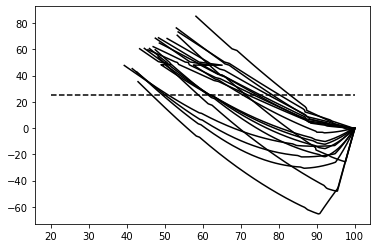

In [13]:
f, a = plt.subplots(1,1)
a.plot([20,100], [25,25], '--k')
for r in Results.keys():
    #if Results[r]['Mass']['fluid1'].loc[0]<0.1:
    if Results[r]['liquid1']['H2O_Liq'].loc[i]>3:
        a.plot(Results[r]['Mass']['liquid1'], Results[r]['All']['P_bar']/10 - 150, '-k')

In [8]:
len(Results.keys())

41